# Mass Spec cohort housekeeping protein analysis 

### Imports and environment setup

- Date of run: 2024-10-03
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprocessing

## 38 dataset

In [4]:
MS_38_PATH = "../data/ms/MS_verification_38.csv"
df_38 = pd.read_csv(MS_38_PATH, sep="\t", header=[0,1], index_col=0)

RESULTS_PATH_38 = "../data/results/38"
df_38_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH_38}/direct/max_1.csv', sep=',', index_col=0, header=0)

# Combine the names of headers at level 0 and 1 and make them the new headers
df_38.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_38.columns.values]

# Rename the column 0 to "Pathology" and make it categorical
df_38 = df_38.rename(columns={df_38.columns[0]: "Pathology"})
df_38 = utils.cols_as_category(df_38, {'Pathology':{'C2': 0, 'T1': 1}})

BIOMARKERS_38 = df_38.columns[1:]

## 215 dataset

In [5]:
MS_215_PATH = "../data/ms/MS_215_ratios.csv"
df_215 = pd.read_csv(MS_215_PATH, sep=",", header=[0,1], index_col=0)

# Combine the names of headers at level 0 and 1 and make them the new headers
df_215.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_215.columns.values]

df_215 = df_215.rename(columns={df_215.columns[0]: "Pathology"})
df_215['Pathology'] = df_215['Pathology'].apply(lambda x: 1 if x.startswith("T") else 0)

# Rename the first column as "Pathology" and make it categorical
df_215 = df_215.rename(columns={df_215.columns[0]: "Pathology"})

# Delete the second and thiird columns
df_215 = df_215.drop(columns=df_215.columns[1:3])

BIOMARKERS_215 = df_215.columns[1:]

## 107 dataset

In [6]:
MS_107_PATH = "../data/ms/MS_validation_107_9_hyperplasias.csv"
df_107 = pd.read_csv(MS_107_PATH, sep="\t", header=[0,1], index_col=0)

RESULTS_PATH_107 = "../data/results/107"
df_107_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH_107}/direct/max_1.csv', sep=',', index_col=0, header=0)

# Combine the names of headers at level 0 and 1 and make them the new headers
df_107.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_107.columns.values]

df_107 = df_107.rename(columns={df_107.columns[0]: "Pathology"})
df_107['Pathology'] = df_107['Pathology'].apply(lambda x: 1 if x.startswith("T") else 0)


# Rename the first column as "Pathology" and make it categorical
df_107 = df_107.rename(columns={df_107.columns[0]: "Pathology"})

BIOMARKERS_107 = df_107.columns[1:]

# Computing the variation coefficient of each peptide

In [7]:
def compute_variation_coefficient(df):
    mean_std_df = df.describe().loc[['mean', 'std']].T
    mean_std_df['std'] = mean_std_df['std'].round(2)
    mean_std_df['mean'] = mean_std_df['mean'].round(2)
    mean_std_df['variation_coefficient'] = (mean_std_df['std'] / mean_std_df['mean']).round(2)
    mean_std_df = mean_std_df.sort_values(by='variation_coefficient', ascending=True)
    return mean_std_df

In [8]:
df_38_mean_std = compute_variation_coefficient(df_38)
df_215_mean_std = compute_variation_coefficient(df_215)
df_107_mean_std = compute_variation_coefficient(df_107)


As an example, let's see how this computed datasets looks like:

In [9]:
df_38_mean_std.head(10)

,mean,std,variation_coefficient
CALU_TFDQLTPEESK,0.19,0.11,0.58
SODC_AVCVLK,4.69,2.97,0.63
SODC_TLVVHEK,2.90,1.86,0.64
PEBP1_VLTPTQVK,4.49,2.97,0.66
PEBP1_LYEQLSGK,5.70,3.96,0.69
LEG1_SFVLNLGK,1.09,0.81,0.74
PPIA_FEDENFILK,1.23,0.92,0.75
SPIT1_WYYDPTEQICK,0.29,0.22,0.76
TIMP2_EVDSGNDIYGNPIK,0.17,0.13,0.76
PPIA_VSFELFADK,1.85,1.40,0.76


Since the peptides in each experiment could be different, we will focus only on the proteins. Let's take the gene names fron the index and make the peptides a column not part of the index. 

In [10]:
df_38_mean_std['gene'] = df_38_mean_std.index.str.split('_').str[0]
df_38_mean_std['peptide'] = df_38_mean_std.index.str.split('_').str[1]
df_38_mean_std = df_38_mean_std.set_index('gene')

df_215_mean_std['gene'] = df_215_mean_std.index.str.split('_').str[0]
df_215_mean_std['peptide'] = df_215_mean_std.index.str.split('_').str[1]
df_215_mean_std = df_215_mean_std.set_index('gene')

df_107_mean_std['gene'] = df_107_mean_std.index.str.split('_').str[0]
df_107_mean_std['peptide'] = df_107_mean_std.index.str.split('_').str[1]
df_107_mean_std = df_107_mean_std.set_index('gene')


Now it looks as follows:

In [11]:
df_38_mean_std.head(10)

,mean,std,variation_coefficient,peptide
gene,,,,
CALU,0.19,0.11,0.58,TFDQLTPEESK
SODC,4.69,2.97,0.63,AVCVLK
SODC,2.90,1.86,0.64,TLVVHEK
PEBP1,4.49,2.97,0.66,VLTPTQVK
PEBP1,5.70,3.96,0.69,LYEQLSGK
LEG1,1.09,0.81,0.74,SFVLNLGK
PPIA,1.23,0.92,0.75,FEDENFILK
SPIT1,0.29,0.22,0.76,WYYDPTEQICK
TIMP2,0.17,0.13,0.76,EVDSGNDIYGNPIK


Each protein will have a heavy and a light peptide, let's take of them the one that variates the most.

In [12]:
df_38_mean_std = df_38_mean_std.groupby('gene').max().sort_values(by='variation_coefficient', ascending=True)
df_215_mean_std = df_215_mean_std.groupby('gene').max().sort_values(by='variation_coefficient', ascending=True)
df_107_mean_std = df_107_mean_std.groupby('gene').max().sort_values(by='variation_coefficient', ascending=True)

In [13]:
# drop nan values
df_38_mean_std = df_38_mean_std.dropna()
df_215_mean_std = df_215_mean_std.dropna()
df_107_mean_std = df_107_mean_std.dropna()

Let's plot the distribution of the C.V.

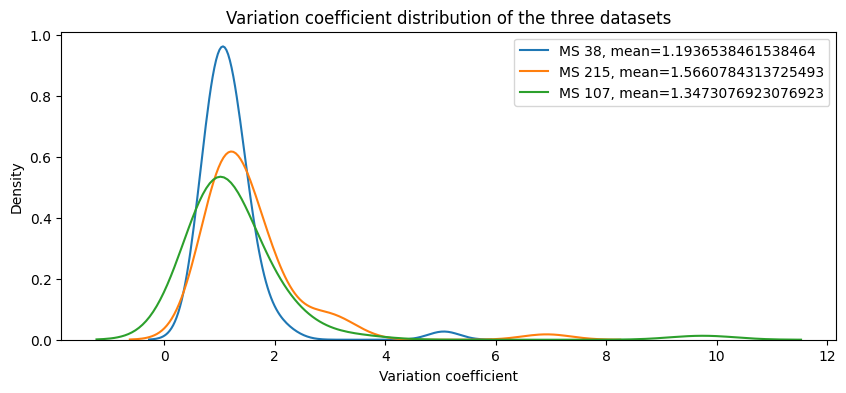

In [14]:
# Plot in a single kdeplo the variation coefficient of the three datasets
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(df_38_mean_std['variation_coefficient'], label=f"MS 38, mean={df_38_mean_std['variation_coefficient'].mean()}")
sns.kdeplot(df_215_mean_std['variation_coefficient'], label=f"MS 215, mean={df_215_mean_std['variation_coefficient'].mean()}")
sns.kdeplot(df_107_mean_std['variation_coefficient'], label=f"MS 107, mean={df_107_mean_std['variation_coefficient'].mean()}")
plt.title("Variation coefficient distribution of the three datasets")
plt.xlabel("Variation coefficient")
plt.ylabel("Density")
plt.legend()
plt.show()

As an example, let's see the variation among groups for the less-variating protein

<Axes: xlabel='Pathology', ylabel='CALU_TFDQLTPEESK'>

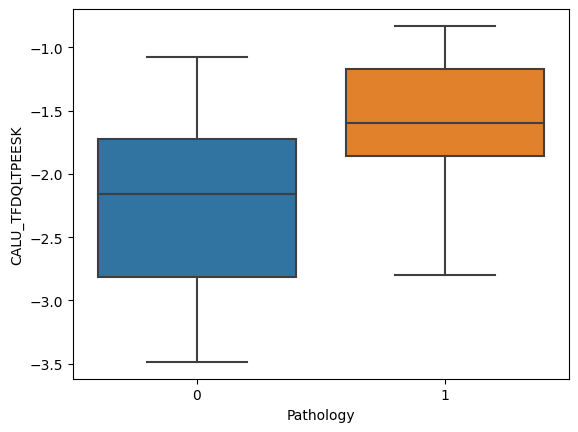

In [15]:
sns.boxplot(x=df_38['Pathology'], y=df_38[df_38_mean_std.iloc[0].name+"_"+df_38_mean_std.iloc[0].peptide].apply(np.log))

And let's compare it with the second most variating protein.

<Axes: xlabel='Pathology', ylabel='PAEP_VLVEDDEIMQGFIR'>

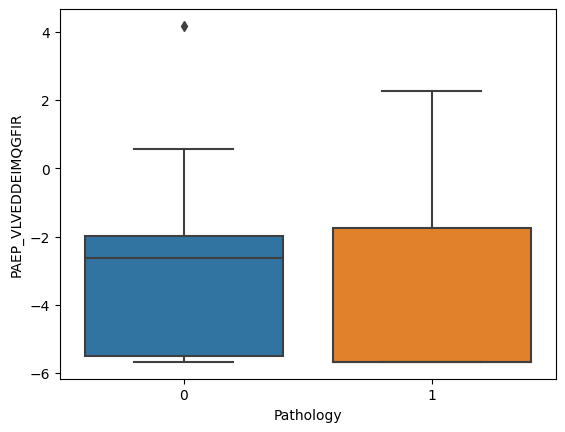

In [16]:
sns.boxplot(x=df_38['Pathology'], y=df_38[df_38_mean_std.iloc[-1].name+"_"+df_38_mean_std.iloc[-1].peptide].apply(np.log))

Ok, that didn't worked. This protein is wide in distribution but both overlaps. Let's compare it with the second most variating protein.

<Axes: xlabel='Pathology', ylabel='PERM_VVLEGGIDPILR'>

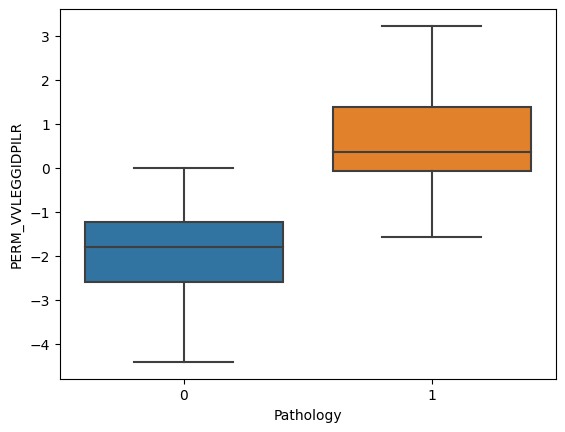

In [17]:
sns.boxplot(x=df_38['Pathology'] , y=df_38[df_38_mean_std.iloc[-2].name+"_"+df_38_mean_std.iloc[-2].peptide].apply(np.log)) 

What we observe is that variation and distribution of the conditions is not the same, we should look into both things.

# Computing the variation among benign and EC conditions

In [18]:
# Compute for Pathology 1 and 0 how much the distribution of the biomarkers differ
# from each other using statistics libraries
import scipy.stats as stats

def compute_p_values(df, biomarkers):
    p_values = {}
    for biomarker in biomarkers:
        p_values[biomarker] = stats.ttest_ind(df[df['Pathology'] == 1][biomarker], df[df['Pathology'] == 0][biomarker])[1]
    return p_values

p_values_38 = compute_p_values(df_38, BIOMARKERS_38)
for row in df_38_mean_std.iterrows():
    df_38_mean_std.loc[row[0], 'p_value'] = p_values_38[row[0]+"_"+row[1].peptide]

p_values_215 = compute_p_values(df_215, BIOMARKERS_215)
for row in df_215_mean_std.iterrows():
    df_215_mean_std.loc[row[0], 'p_value'] = p_values_215[row[0]+"_"+row[1].peptide]

p_values_107 = compute_p_values(df_107, BIOMARKERS_107)
for row in df_107_mean_std.iterrows():
    df_107_mean_std.loc[row[0], 'p_value'] = p_values_107[row[0]+"_"+row[1].peptide]
    

In [19]:
df_38_candidates = df_38_mean_std[(df_38_mean_std['p_value'] > 0.05) & (df_38_mean_std['variation_coefficient'] < df_38_mean_std['variation_coefficient'].mean())]
df_215_candidates = df_215_mean_std[(df_215_mean_std['p_value'] > 0.05) & (df_215_mean_std['variation_coefficient'] < df_215_mean_std['variation_coefficient'].mean())]
df_107_candidates = df_107_mean_std[(df_107_mean_std['p_value'] > 0.05) & (df_107_mean_std['variation_coefficient'] < df_107_mean_std['variation_coefficient'].mean())]

In [20]:
# Are there any common candidates between the three datasets?
common_candidates = set(df_38_candidates.index) & set(df_215_candidates.index) & set(df_107_candidates.index)

common_candidates

set()

In [21]:
# Are there any common candidates between the two datasets?
common_candidates_38_215 = set(df_38_candidates.index) & set(df_215_candidates.index)
common_candidates_38_107 = set(df_38_candidates.index) & set(df_107_candidates.index)
common_candidates_215_107 = set(df_215_candidates.index) & set(df_107_candidates.index)

print("common_candidates_38_215 ", common_candidates_38_215)
print("common_candidates_38_107 ", common_candidates_38_107)
print("common_candidates_215_107 ", common_candidates_215_107)


common_candidates_38_215  set()
common_candidates_38_107  {'VIME', 'SERPH', 'TIMP2', 'FSCN1'}
common_candidates_215_107  set()


In [22]:
# How many genes are in the three datasets? How many are in the two datasets? How many are in only one dataset?
print("All: ", len(set(df_38_mean_std.index) & set(df_215_mean_std.index) & set(df_107_mean_std.index)))

print("38 and 215: ", len(set(df_38_mean_std.index) & set(df_215_mean_std.index)))
print("38 and 107: ", len(set(df_38_mean_std.index) & set(df_107_mean_std.index)))
print("215 and 107: ", len(set(df_215_mean_std.index) & set(df_107_mean_std.index)))

print("38 only: ", len(set(df_38_mean_std.index) - set(df_215_mean_std.index) - set(df_107_mean_std.index)))
print("215 only: ", len(set(df_215_mean_std.index) - set(df_38_mean_std.index) - set(df_107_mean_std.index)))
print("107 only: ", len(set(df_107_mean_std.index) - set(df_38_mean_std.index) - set(df_215_mean_std.index)))



All:  29
38 and 215:  29
38 and 107:  52
215 and 107:  29
38 only:  0
215 only:  22
107 only:  0


In [23]:
candidates_215_not_38_107 =  df_215_candidates[~df_215_candidates.index.isin(set(df_38_mean_std.index) & set(df_107_mean_std.index))].index
candidates_38_107_not_215 = df_38_candidates[df_38_candidates.index.isin(common_candidates_38_107) & ~df_38_candidates.index.isin(df_215_mean_std.index)].index

In [24]:
PROTEIN_DATA_PATH = '../data/ms/Womec_DIA_protein_data.csv'
df_protein_data = pd.read_csv(PROTEIN_DATA_PATH, sep='\t', index_col='Genes', header=0)

In [27]:
def find_candidates(candidates, df_protein_data, label):
    print(f"Candidates in {label}:")

    for p in candidates:
        found = False

        # Search in index
        for idx in df_protein_data.index:
            if p in str(idx).split(';'):
                print(p, df_protein_data.loc[idx]['First.Protein.Description'])
                found = True
                break

        if found:
            continue

        # Search in 'Protein.Names' column
        for _, row in df_protein_data.iterrows():
            if p + "_HUMAN" in row['Protein.Names'].split(';'):
                print(p, row['First.Protein.Description'])
                found = True
                break

        if not found:
            print(f"{p} not found")

In [28]:
find_candidates(candidates_215_not_38_107, df_protein_data, "215 not studied in 38 and 107")
print("-----")
find_candidates(candidates_38_107_not_215, df_protein_data, "38 and 107 not studied in 215")

Candidates in 215 not studied in 38 and 107:
LAT1 Large neutral amino acids transporter small subunit 1
SH3L3 SH3 domain-binding glutamic acid-rich-like protein 3
RAB8A Ras-related protein Rab-3D
RL11 60S ribosomal protein L11
SMD3 Small nuclear ribonucleoprotein Sm D3
ITA3 Integrin alpha-3
VAMP8 Vesicle-associated membrane protein 8
IMB1 Importin subunit beta-1
MVP Major vault protein
RL12 60S ribosomal protein L12
RL29 60S ribosomal protein L29
RL13A 60S ribosomal protein L13a
-----
Candidates in 38 and 107 not studied in 215:
TIMP2 Metalloproteinase inhibitor 2
FSCN1 Fascin
VIME Keratin, type II cytoskeletal 6B
SERPH Serpin H1


In [ ]:
df_38_mean_std[df_38_mean_std.index == "TIMP2"]

,mean,std,variation_coefficient,peptide,p_value
gene,,,,,
TIMP2,0.17,0.13,0.76,EVDSGNDIYGNPIK,0.938162


In [ ]:
df_107_mean_std[df_107_mean_std.index == "TIMP2"]

,mean,std,variation_coefficient,peptide,p_value
gene,,,,,
TIMP2,0.16,0.13,0.81,EVDSGNDIYGNPIK,0.113771


<Axes: xlabel='Pathology', ylabel='TIMP2_EVDSGNDIYGNPIK'>

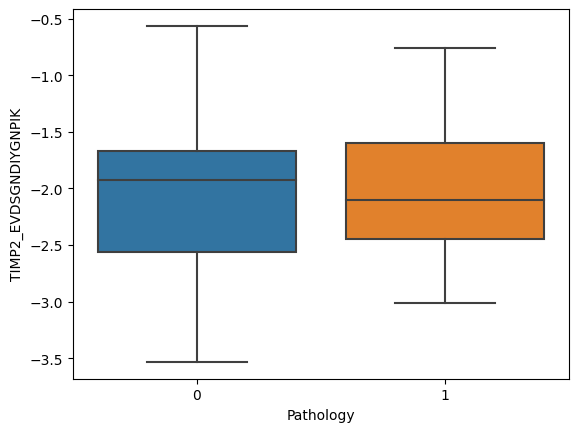

In [ ]:
sns.boxplot(x=df_38['Pathology'] , y=df_38["TIMP2_EVDSGNDIYGNPIK"].apply(np.log)) 


In [33]:
df_38_results_direct_max_1[df_38_results_direct_max_1.index.str[0:5] == "TIMP2"]

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
TIMP2_EVDSGNDIYGNPIK,0.48056,0.1,0.94444,0.48571,0.66667,0.53535


In [32]:
df_107_results_direct_max_1[df_107_results_direct_max_1.index.str[0:5] == "TIMP2"]

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
TIMP2_EVDSGNDIYGNPIK,0.56388,0.18841,0.94737,0.3913,0.86667,0.72727


In [34]:
df_38_results_direct_max_1[df_38_results_direct_max_1.index.str[0:4] == "MMP9"]

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
MMP9_SLGPALLLLQK,0.91389,0.95,0.83333,0.93750,0.86364,0.60606
MMP9_AFALWSAVTPLTFTR,0.91389,0.95,0.77778,0.93333,0.82609,0.58586


In [35]:
df_107_results_direct_max_1[df_107_results_direct_max_1.index.str[0:4] == "MMP9"]

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
MMP9_SLGPALLLLQK,0.89340,0.85507,0.81579,0.7561,0.89394,0.64646
MMP9_AFALWSAVTPLTFTR,0.89321,0.86957,0.81579,0.7750,0.89552,0.61616


In [ ]:
_ = utils.compute_all_models_and_save(df=df_400, 
                                      biomarkers=['MMP9_SLGPALLLLQK','TIMP2_EVDSGNDIYGNPIK'], 
                                      target_col='Pathology', 
                                      methods=['biomarker_ratio'], 
                                      max_biomarker_count=2,
                                      folder_name="../data/results/107_ratios",
                                      auc_threshold=0.85)